# Dogs vs Cats Kaggle competition

Data split:  
1000 for training  
 500 for validation  
 500 for test  
 

 https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb

In [1]:
import os, shutil

In [2]:
original_dataset_dir = './dogs-vs-cats/train'

# The directory where we will store our smaller dataset
base_dir = './cats_and_dogs_small'

In [3]:
# Copy first 1000 cat images to train_cats_dir
train_cats_dir = os.path.join(base_dir, 'train/cats')
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
validation_cats_dir = os.path.join(base_dir, 'validation/cats')
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
test_cats_dir = os.path.join(base_dir, 'test/cats')
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
train_dogs_dir = os.path.join(base_dir, 'train/dogs')
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
validation_dogs_dir = os.path.join(base_dir, 'validation/dogs')
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
test_dogs_dir = os.path.join(base_dir, 'test/dogs')
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
"""
More data -> needs more layers. This reduces the size of the feature maps when we reach the Flatten layer.
"""
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))    # binary classification -- use sigmoid on one unit.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',      # Again, binary classification
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data Preprocessing

- Read the picture files.
- Decode the JPEG content to RBG grids of pixels.
- Convert these into floating point tensors.
- Rescale the pixel values (between 0 and 255) to the (0,1) interval.

Because loading the entrie dataset at once will sufficate memory (in the previous simplier workflow), we can use a DATA GENERATOR to feed in the data on-demand!!! 

In [9]:
"""
Use Keras buildin data generators.
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = os.path.join(base_dir, 'train')  
validation_dir = os.path.join(base_dir, 'validation')

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the target directory
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
"""
The data batch shape is (20, 150, 150, 3)
    20 is the number of samples in each batch (ie. the batch size).
    Each batch contains 150x150 images with 3 channels.
The labels batch shape is (20,)
    This is because there are 20 samples in each batch, and the label is one value (binary).
"""
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
"""
train_generator -- 
    yield batches of inputs and targets indefinitely.
steps_per_epoch -- 
    This is the number of draws (of a batch) from the generator per epoch.
    Since model is updated after each mini-batch, this is also 
    the number of gradient descent steps per epoch. 

validation_steps -- 
    number of batches to draw from the validation generator for evaluation.

That is to say...
    For each epoch, the train_generator yields 'steps_per_epoch' batches.
    When an epoch ends, the validation generator will yield 'validation_steps' batches.
"""

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 7s 66ms/step - loss: 0.6863 - acc: 0.5560 - val_loss: 0.7167 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6659 - acc: 0.5930 - val_loss: 0.6503 - val_acc: 0.6090
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6153 - acc: 0.6690 - val_loss: 0.6028 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5749 - acc: 0.7000 - val_loss: 0.5914 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5415 - acc: 0.7230 - val_loss: 0.5649 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5144 - acc: 0.7460 - val_loss: 0.6107 - val_acc: 0.6620
Epoch 7/30
100/100 [==============================] - 6s 64ms/step - loss: 0.4845 - acc: 0.7595 - val_loss: 0.6192 - val_acc: 

In [12]:
# It is good practice to always save your models after training.
model.save('cats_and_dogs_small_1.h5')

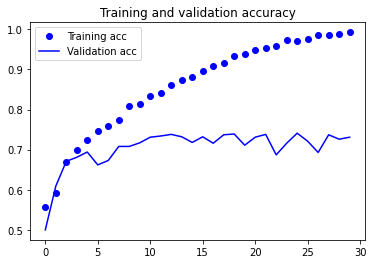

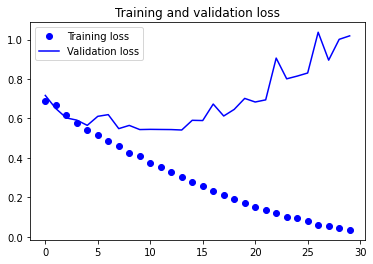

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Data Augmentation
Above plots are characteristic of overfitting. Use data augmentation to counter it.

- rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures.
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range is for randomly zooming inside pictures.
- horizontal_flip is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [14]:
# Use Keras buildin utility for generting believable-looking images.
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

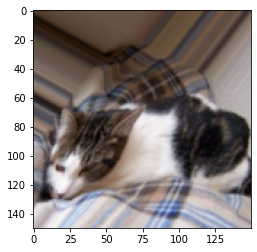

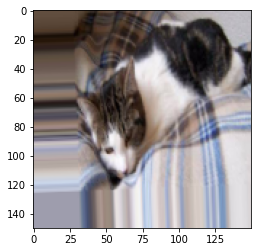

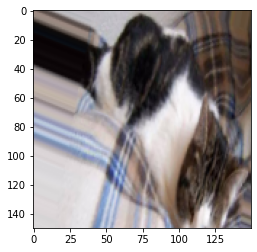

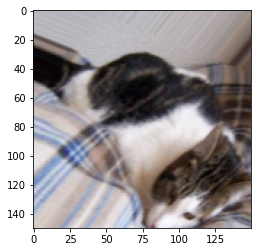

In [15]:
### Visualization of data augmentation

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [16]:
"""
In addition to data augmentation, add a dropout layer right before the densely-connected classifier.
"""
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [20]:
"""
Let's train our network using data augmentation and dropout:
"""
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 14s 137ms/step - loss: 0.6880 - acc: 0.5440 - val_loss: 0.6935 - val_acc: 0.5020
Epoch 2/100
100/100 [==============================] - 14s 136ms/step - loss: 0.6815 - acc: 0.5575 - val_loss: 0.6627 - val_acc: 0.5960
Epoch 3/100
100/100 [==============================] - 14s 136ms/step - loss: 0.6709 - acc: 0.5815 - val_loss: 0.6588 - val_acc: 0.5950
Epoch 4/100
100/100 [==============================] - 14s 135ms/step - loss: 0.6580 - acc: 0.6070 - val_loss: 0.6233 - val_acc: 0.6610
Epoch 5/100
100/100 [==============================] - 14s 135ms/step - loss: 0.6474 - acc: 0.6235 - val_loss: 0.6111 - val_acc: 0.6700
Epoch 6/100
100/100 [==============================] - 14s 135ms/step - loss: 0.6345 - acc: 0.6405 - val_loss: 0.5954 - val_acc: 0.6850
Epoch 7/100
100/100 [==============================] - 14s 138ms/step - loss: 0.6192 - acc: 0.6485 -

In [21]:
model.save('cats_and_dogs_small_2.h5')

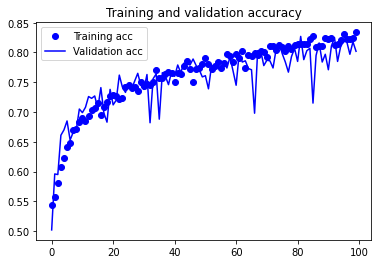

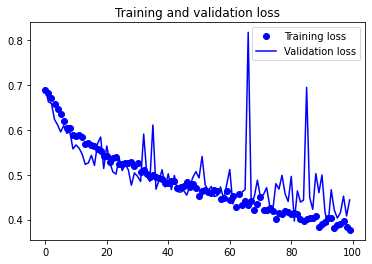

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()